In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

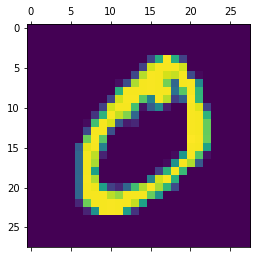

In [7]:
plt.matshow(X_train[1])

In [7]:
y_train[1]

0

In [9]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

#### Scaling

In [10]:
X_train = X_train/255
X_test = X_test/255

#### Creating Model

In [8]:
#We won't flatten our X_train and y_train here cos we are directly using 'Flatten' in our model creation

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer= 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 2.4469 - accuracy: 0.8266
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4323 - accuracy: 0.8938
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3105 - accuracy: 0.9197
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2722 - accuracy: 0.9295
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2418 - accuracy: 0.9368


In [10]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2707 - accuracy: 0.9391


[0.2707210183143616, 0.9391000270843506]

In [11]:
y_predict = model.predict(X_test)
y_predict

313/313 [==============================] - 1s 4ms/step


array([[1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        9.9812180e-01, 1.0000000e+00],
       [1.5387321e-13, 3.0912677e-09, 3.2632729e-01, ..., 3.4886583e-08,
        6.0874272e-10, 0.0000000e+00],
       [6.3822519e-08, 1.0000000e+00, 9.9998915e-01, ..., 1.0000000e+00,
        9.9997014e-01, 9.9999124e-01],
       ...,
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 1.0000000e+00,
        9.9999917e-01, 1.0000000e+00],
       [1.0000000e+00, 3.3545700e-22, 1.0000000e+00, ..., 9.9999684e-01,
        1.0000000e+00, 1.7453685e-21],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, ..., 9.9999607e-01,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

In [12]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [13]:
np.argmax(y_predict[2])

1

In [14]:
y_predict_labels = [np.argmax(i) for i in y_predict]

In [15]:
y_predict_labels[:5]

[0, 2, 1, 0, 4]

In [17]:
cm = tf.math.confusion_matrix(labels=y_test , predictions=y_predict_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 974,    1,    0,    0,    1,    0,    2,    0,    1,    1],
       [   1, 1118,    3,    1,    0,    0,    3,    0,    9,    0],
       [  11,   56,  924,   11,    0,    0,    2,    4,   23,    1],
       [ 306,  290,  132,  237,    0,    5,    1,    2,   36,    1],
       [ 372,  125,  297,   11,  126,    0,   12,    1,    6,   32],
       [ 767,   16,    9,   45,    0,   32,    6,    0,   15,    2],
       [ 824,    4,    2,    1,    4,   13,   95,    0,   14,    1],
       [ 286,  261,   84,  115,   10,    4,    0,  246,    3,   19],
       [  92,    4,   50,   19,    4,    8,    0,    2,  789,    6],
       [  16,  146,  268,  120,  211,    2,    0,   10,   11,  225]])>

Text(58.222222222222214, 0.5, 'Truth')

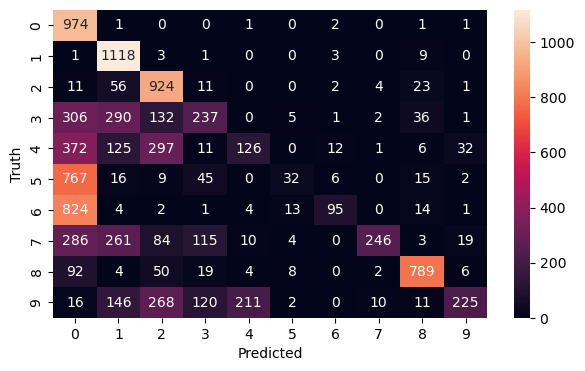

In [19]:
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Tuning Parameters

In [33]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28,28)),
#     keras.layers.Dense(100, activation='relu'),
#     keras.layers.Dense(10, activation='sigmoid')
# ])

# model.compile(
#     optimizer= 'adam',
#     loss= 'sparse_categorical_crossentropy',
#     metrics= ['accuracy']
# )

# model.fit(X_train, y_train, epochs=5)